**Week 1 Dynamic BFS and DFS Traversal problem**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
graph = {}
edge_set = set()

# Add a node only if it doesn't already exist
def add_node(node):
    if node in graph:
        print(f"'{node}' already exists. Please enter a different node.")
        return False
    graph[node] = []
    return True

# Add edge only if not a duplicate
def add_edge(u, v):
    edge = tuple(sorted((u, v)))
    if edge in edge_set:
        print(f"Edge {u}-{v} already exists. Please enter a different edge.")
        return False
    if u not in graph or v not in graph:
        print("Both nodes must be added before connecting them with an edge.")
        return False

    graph[u].append(v)
    graph[v].append(u)
    edge_set.add(edge)
    return True

# BFS
def bfs(start):
    visited = []
    queue = [start]
    print("BFS:", end=" ")

    while queue:
        node = queue.pop(0)
        if node not in visited:
            print(node, end=" ")
            visited.append(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)
    print()

# DFS
def dfs(node, visited=None):
    if visited is None:
        visited = []
        print("DFS:", end=" ")

    if node not in visited:
        print(node, end=" ")
        visited.append(node)
        for neighbor in graph[node]:
            dfs(neighbor, visited)

# === Input Section ===
# Add unique nodes
n = int(input("Enter number of nodes: "))
i = 0
while i < n:
    node = input(f"Enter node {i + 1}: ").strip()
    if add_node(node):
        i += 1

# Add edges without duplication
e = int(input("Enter number of edges: "))
for i in range(e):
    while True:
        u, v = input(f"Enter edge {i + 1} (two nodes): ").split()
        if add_edge(u, v):
            break

# Start traversal
start = input("Enter starting node: ").strip()
if start in graph:
    bfs(start)
    dfs(start)
    print()
else:
    print("Starting node not found in the graph.")



Enter number of nodes: 7
Enter node 1: 5
Enter node 2: 2
Enter node 3: 3
Enter node 4: 4
Enter node 5: 8
Enter node 6: 6
Enter node 7: 3
'3' already exists. Please enter a different node.
Enter node 7: 7
Enter number of edges: 6
Enter edge 1 (two nodes): 5 2
Enter edge 2 (two nodes): 5 3
Enter edge 3 (two nodes): 2 4
Enter edge 4 (two nodes): 2 4
Edge 2-4 already exists. Please enter a different edge.
Enter edge 4 (two nodes): 2 8
Enter edge 5 (two nodes): 3 6
Enter edge 6 (two nodes): 8 7
Enter starting node: 5
BFS: 5 2 3 4 8 6 7 
DFS: 5 2 4 8 7 3 6 


**Week2 A *** ***algorithm Implementation***

In [ ]:
def aStarAlgo(start_node, stop_node):
    open_set = {start_node}  # Set of nodes to be evaluated
    closed_set = set()  # Set of nodes already evaluated
    g = {}  # Dictionary to store the distance from the start node
    parents = {}  # Dictionary to store the parent of each node

    # The distance from the start node to itself is zero
    g[start_node] = 0
    # The start node has no parent (it is the root)
    parents[start_node] = start_node

    while open_set:
        n = None

        # Node with the lowest f() = g + heuristic() value is chosen
        for v in open_set:
            if n is None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v

        # Print current node being evaluated, heuristic value and the sets
        print(f"\nEvaluating node: {n} (g: {g[n]}, h: {heuristic(n)}, f: {g[n] + heuristic(n)})")
        print(f"Open Set: {open_set}")
        print(f"Closed Set: {closed_set}")

        # If the goal is reached or no more nodes can be explored
        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()  # Reverse the path to get from start to goal
            print('Path found: {}'.format(path))
            return path

        # Explore neighbors of the current node
        print(f"Exploring neighbors of {n}:")
        for (m, weight) in get_neighbors(n):
            h_m = heuristic(m)  # Heuristic value of the neighbor
            print(f"  Neighbor: {m} with weight: {weight} and h({m}): {h_m}")

            if m not in open_set and m not in closed_set:
                open_set.add(m)
                parents[m] = n
                g[m] = g[n] + weight
                print(f"  Added {m} to open set with g({m}) = {g[m]} and f({m}) = {g[m] + h_m}")
            else:
                if g[m] > g[n] + weight:
                    g[m] = g[n] + weight
                    parents[m] = n
                    if m in closed_set:
                        closed_set.remove(m)
                        open_set.add(m)
                        print(f"  Updated {m} to have a shorter path with g({m}) = {g[m]} and f({m}) = {g[m] + h_m}")

        open_set.remove(n)
        closed_set.add(n)

    print('Path does not exist!')
    return None

# Function to return neighbors and their distances
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    return []

# Heuristic function for each node (Manhattan or other heuristic values)
def heuristic(n):
    H_dist = {
        'S': 5,
        'A': 3,
        'B': 4,
        'C': 2,
        'D': 6,
        'G': 0,
    }
    return H_dist.get(n, 0)

# Graph representation (node -> list of (neighbor, weight))
Graph_nodes = {
    'S': [('A', 1), ('G', 10)],
    'A': [('B', 2), ('C', 1)],
    'B': [('D', 5)],
    'C': [('D', 3), ('G', 4)],
    'D': [('G', 2)],
}

# Run the algorithm
aStarAlgo('S', 'G')



Evaluating node: S (g: 0, h: 5, f: 5)
Open Set: {'S'}
Closed Set: set()
Exploring neighbors of S:
  Neighbor: A with weight: 1 and h(A): 3
  Added A to open set with g(A) = 1 and f(A) = 4
  Neighbor: G with weight: 10 and h(G): 0
  Added G to open set with g(G) = 10 and f(G) = 10

Evaluating node: A (g: 1, h: 3, f: 4)
Open Set: {'G', 'A'}
Closed Set: {'S'}
Exploring neighbors of A:
  Neighbor: B with weight: 2 and h(B): 4
  Added B to open set with g(B) = 3 and f(B) = 7
  Neighbor: C with weight: 1 and h(C): 2
  Added C to open set with g(C) = 2 and f(C) = 4

Evaluating node: C (g: 2, h: 2, f: 4)
Open Set: {'B', 'G', 'C'}
Closed Set: {'S', 'A'}
Exploring neighbors of C:
  Neighbor: D with weight: 3 and h(D): 6
  Added D to open set with g(D) = 5 and f(D) = 11
  Neighbor: G with weight: 4 and h(G): 0

Evaluating node: G (g: 6, h: 0, f: 6)
Open Set: {'B', 'G', 'D'}
Closed Set: {'C', 'S', 'A'}
Path found: ['S', 'A', 'C', 'G']


['S', 'A', 'C', 'G']

**Week 3 Travelling Salesman Problem Implementaion using Python**

In [ ]:
from sys import maxsize  # Import maxsize to represent an infinitely large value (for comparison)
from itertools import permutations  # Import permutations to generate all possible orders of cities

v = 4  # Number of cities (vertices), here v = 4 (cities labeled 0, 1, 2, 3)

# Function to find the shortest path for the Traveling Salesman Problem
def travellingSalesmanProblem(graph, s):
    vertex = []  # List to store all cities excluding the start city 's'

    # Loop through all the cities and add those that are not the starting city 's'
    for i in range(v):
        if i != s:
            vertex.append(i)  # Add city i to the list 'vertex' if it's not the start city

    # Initialize min_path to a very large value (infinity), so it can be updated with valid paths
    min_path = maxsize

    # Generate all possible permutations of the cities in 'vertex'
    # This will give all possible orders of visiting the cities
    next_permutation = permutations(vertex)

    # Iterate through each permutation of cities
    for i in next_permutation:
        current_pathweight = 0  # Initialize the total distance of the current path
        k = s  # Start at the initial city (starting city is 's')

        # Loop through the cities in the current permutation
        for j in i:
            current_pathweight += graph[k][j]  # Add the distance from the current city 'k' to the next city 'j'
            k = j  # Update the current city to the next city

        # After visiting all cities, add the distance to return to the starting city
        current_pathweight += graph[k][s]  # Add the distance from the last city back to the start city

        # Update min_path if the current path weight is smaller than the previous min_path
        min_path = min(min_path, current_pathweight)

    # Return the shortest path found after evaluating all permutations
    return min_path

# Example graph where the value graph[i][j] represents the distance from city 'i' to city 'j'
graph = [
    [0, 10, 15, 20],  # Distances from city 0 to others
    [10, 0, 35, 25],  # Distances from city 1 to others
    [15, 35, 0, 30],  # Distances from city 2 to others
    [20, 25, 30, 0]   # Distances from city 3 to others
]

s = 0  # Set the starting city (index 0, which is city 0)

# Call the function and print the result
print(travellingSalesmanProblem(graph, s))  # Output: 80


80


**Week 3 Graph Coloring Problem Implementaion using Python**

In [ ]:
#Graph Coloring Problem
colors=['Red','Blue','Green']
states=['a','b','c','d']
neighbors={}
neighbors['a']=['b','c','d']
neighbors['b']=['a','d']
neighbors['c']=['a','d']
neighbors['d']=['c','b','a']

colors_of_states={}

def promising(state,color):#d,green
    for neighbor in neighbors.get(state):#c,b,a
        color_of_neighbor=colors_of_states.get(neighbor)#blue
        if color_of_neighbor==color:#b==b
            return False
    return True

def get_color_for_state(state):#d
    for color in colors:#Red,Blue,Green
        if promising(state,color):#d,Red
            return color

def main():
    for state in states:#c,d
        colors_of_states[state]=get_color_for_state(state)#a:Red,b:blue,c:blue,d:green

    print(colors_of_states)

main()

{'a': 'Red', 'b': 'Blue', 'c': 'Blue', 'd': 'Green'}


**Week 4 Implementation of Knowledge Representation**

In [ ]:
from sympy import symbols, Or, Not, Implies,Xor,satisfiable

# Define propositional variables
Rain = symbols('Rain')
Harry_Visited_Hagrid = symbols('Harry_Visited_Hagrid')
Harry_Visited_Dumbledore = symbols('Harry_Visited_Dumbledore')

# Define the logical expressions based on the given statements
sentence_1 = Implies(Not(Rain), Harry_Visited_Hagrid)
sentence_2 = Xor(Harry_Visited_Hagrid, Harry_Visited_Dumbledore)
sentence_3 = Harry_Visited_Dumbledore

# Combine the statements
knowledge_base = sentence_1 & sentence_2 & sentence_3

#Finding the solution
solution = satisfiable(knowledge_base, all_models=True)

#To print the output
for model in solution:
    if model[Rain]:
        print("It rained today.")
    else:
        print("There is no rain today.")

It rained today.


**Week 5 Implementation of Bayesian Network.**

In [ ]:
#week5
#Bayesian Network
# Define conditional probability tables (CPTs)
P_burglary = 0.002#t
P_earthquake = 0.001#t

# Probability of alarm given burglary and earthquake
P_alarm_given_burglary_and_earthquake = 0.94
P_alarm_given_burglary_and_no_earthquake = 0.95
P_alarm_given_no_burglary_and_earthquake = 0.31
P_alarm_given_no_burglary_and_no_earthquake = 0.001

# Probability of David calling given alarm
P_david_calls_given_alarm = 0.91#t
P_david_does_not_call_given_alarm = 0.09
P_david_calls_given_no_alarm = 0.05#t
P_david_does_not_call_given_no_alarm = 0.95

# Probability of Sophia calling given alarm
P_sophia_calls_given_alarm = 0.75
P_sophia_does_not_call_given_alarm = 0.25
P_sophia_calls_given_no_alarm = 0.02
P_sophia_does_not_call_given_no_alarm = 0.98

# Calculate joint probability
def joint_probability(alarm, burglary, earthquake, david_calls, sophia_calls):#(t,f,f,t,t)
    if alarm:
        if burglary and earthquake:
            P_alarm = P_alarm_given_burglary_and_earthquake
        elif burglary:
            P_alarm = P_alarm_given_burglary_and_no_earthquake
        elif earthquake:
            P_alarm = P_alarm_given_no_burglary_and_earthquake
        else:
            P_alarm = P_alarm_given_no_burglary_and_no_earthquake#0.001
    else:
        if burglary and earthquake:
            P_alarm = 1 - P_alarm_given_burglary_and_earthquake
        elif burglary:
            P_alarm = 1 - P_alarm_given_burglary_and_no_earthquake
        elif earthquake:
            P_alarm = 1 - P_alarm_given_no_burglary_and_earthquake
        else:
            P_alarm = 1 - P_alarm_given_no_burglary_and_no_earthquake

    P_david = (P_david_calls_given_alarm if david_calls else P_david_does_not_call_given_alarm) if alarm else (P_david_calls_given_no_alarm if david_calls else P_david_does_not_call_given_no_alarm)#0.91

    P_sophia = (P_sophia_calls_given_alarm if sophia_calls else P_sophia_does_not_call_given_alarm) if alarm else (P_sophia_calls_given_no_alarm if sophia_calls else P_sophia_does_not_call_given_no_alarm)#0.75

    return (P_burglary if burglary else 1 - P_burglary) * (P_earthquake if earthquake else 1 - P_earthquake) * P_alarm * P_david * P_sophia#0.75*0.91*0.001*0.998*0.999

# Calculate the probability for the given scenario
result = joint_probability(
    alarm=True,
    burglary=False,
    earthquake=False,
    david_calls=True,
    sophia_calls=True
)


# Print the result
print(f'The probability that the alarm has sounded, there is neither a burglary nor an earthquake, and both David and Sophia called Harry is: {result:.8f}')

The probability that the alarm has sounded, there is neither a burglary nor an earthquake, and both David and Sophia called Harry is: 0.00068045


**Week 6 To implement Hidden Markov Model**

In [ ]:
import numpy as np
import itertools
import pandas as pd

# Define state space and probabilities
states = ['sleeping', 'eating', 'pooping']
hidden_states = ['healthy', 'sick']
pi = [0.5, 0.5]  # Initial state probabilities

# Initial state distribution
state_space = pd.Series(pi, index=hidden_states, name='states')
print("Initial Probabilities:\n", state_space, "\n")

# Transition probabilities (hidden -> hidden)
a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc['healthy'] = [0.7, 0.3]
a_df.loc['sick'] = [0.4, 0.6]
print("Transition Probabilities:\n", a_df, "\n")

# Emission probabilities (hidden -> observable)
b_df = pd.DataFrame(columns=states, index=hidden_states)
b_df.loc['healthy'] = [0.2, 0.6, 0.2]
b_df.loc['sick'] = [0.4, 0.1, 0.5]
print("Emission Probabilities:\n", b_df, "\n")

# Forward algorithm: Total probability of observation sequence
def forward_algorithm(obs_seq, a_df, b_df, pi, hidden_states):
    total_prob = 0
    all_state_paths = list(itertools.product(hidden_states, repeat=len(obs_seq)))

    for path in all_state_paths:
        prob = pi[hidden_states.index(path[0])] * b_df.loc[path[0], obs_seq[0]]
        for t in range(1, len(obs_seq)):
            prev_state = path[t - 1]
            curr_state = path[t]
            prob *= a_df.loc[prev_state, curr_state] * b_df.loc[curr_state, obs_seq[t]]
        total_prob += prob

    return total_prob

# Viterbi algorithm: Most likely hidden state sequence
def viterbi_algorithm(obs_seq, a_df, b_df, pi, hidden_states):
    max_prob = 0
    best_path = None
    all_state_paths = list(itertools.product(hidden_states, repeat=len(obs_seq)))

    for path in all_state_paths:
        prob = pi[hidden_states.index(path[0])] * b_df.loc[path[0], obs_seq[0]]
        for t in range(1, len(obs_seq)):
            prev_state = path[t - 1]
            curr_state = path[t]
            prob *= a_df.loc[prev_state, curr_state] * b_df.loc[curr_state, obs_seq[t]]
        if prob > max_prob:
            max_prob = prob
            best_path = path

    return max_prob, best_path

# Example observation sequence
obsq = ['sleeping', 'eating', 'sleeping']

# Run and print
print("Forward (total probability):", forward_algorithm(obsq, a_df, b_df, pi, hidden_states))
v_prob, v_path = viterbi_algorithm(obsq, a_df, b_df, pi, hidden_states)
print("Viterbi (most probable state path):", v_path)
print("Viterbi probability:", v_prob)


Initial Probabilities:
 healthy    0.5
sick       0.5
Name: states, dtype: float64 

Transition Probabilities:
         healthy sick
healthy     0.7  0.3
sick        0.4  0.6 

Emission Probabilities:
         sleeping eating pooping
healthy      0.2    0.6     0.2
sick         0.4    0.1     0.5 

Forward (total probability): 0.0282
Viterbi (most probable state path): ('sick', 'healthy', 'healthy')
Viterbi probability: 0.006719999999999999


**Week 7 To implement Regression algorithm**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/salary_data.csv')
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [ ]:
# data preprocessing
X = dataset.iloc[:, :-1].values  #independent variable array
y = dataset.iloc[:,1].values  #dependent variable vector

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [ ]:
# fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data

LinearRegression()

In [ ]:
# predicting the test set results
y_pred = regressor.predict(X_test)
print(X_test)
y_test

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]


array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

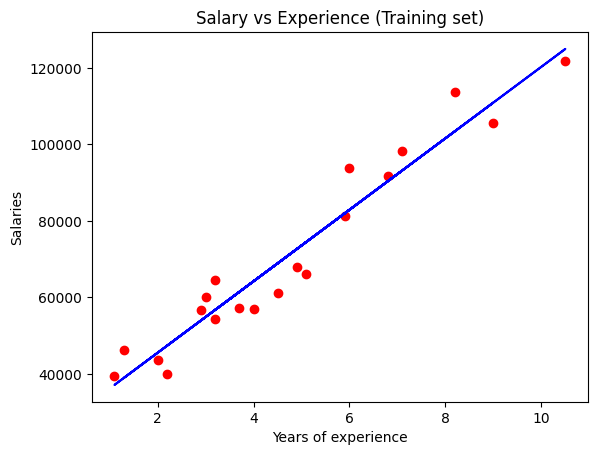

In [ ]:
# visualizing the results
#plot for the TRAIN
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

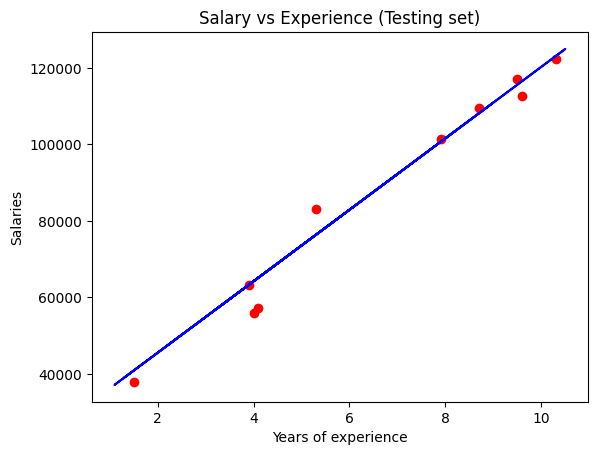

In [ ]:
#plot for the TEST
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Testing set)")# stating the title of the graph
plt.xlabel("Years of experience")# adding the name of x-axis
plt.ylabel("Salaries")# adding the name of y-axis
plt.show()# specifies end of graph

**Week 8 To implement decision tree based ID3 algorithm**

In [ ]:
#Import Play Tennis Data
import pandas as pd
df=pd.read_csv("/content/PlayTennis.csv")
print(df)

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No


**Entropy of the Training Data Set**

In [ ]:
#Function to calculate the entropy of probaility of observations
# -p*log2*p
def entropy(probs):
 import math
 return sum(-prob*math.log(prob,2) for prob in probs)

In [ ]:
#Function to calulate the entropy of the given Data Sets/List with respect to target attributes
def entropy_of_list(a_list):
 from collections import Counter
 cnt = Counter (x for x in a_list) # Counter calculates the propotion of class
 print(cnt)
 num_instances =len(a_list)
 probs=[x/num_instances for x in cnt.values()]
 print(num_instances)
 print(probs)
 return entropy(probs)
total_entropy= entropy_of_list(df['Play Tennis'])
print(total_entropy)

Counter({'Yes': 9, 'No': 5})
14
[0.35714285714285715, 0.6428571428571429]
0.9402859586706309


**Information Gain of Attributes**

In [ ]:
def information_gain(df,split_attribute_name, target_attribute_name, trace=0):
  df_split =df.groupby(split_attribute_name)
  print(df_split)
  for name,group in df_split:
    print("Name",name)
    print("Group",group)
    nobs=len(df.index)*1.0
    print(nobs)
    print("NOBS",nobs)
    df_agg_ent=df_split.agg({target_attribute_name: [entropy_of_list,lambda x: len(x)/nobs] })[target_attribute_name]
    avg_info=sum(df_agg_ent['entropy_of_list'] * df_agg_ent['<lambda_0>'])
    old_entropy=entropy_of_list(df[target_attribute_name])
    return old_entropy-avg_info

**ID3 Algorithm**

In [ ]:
def id3DT(df, target_attribute_name, attribute_names, default_class=None):
  from collections import Counter
  cnt = Counter(x for x in df[target_attribute_name])
  if len(cnt)==1:
     return next(iter(cnt))
  elif df.empty or (not attribute_names):
     return default_class
  else:
     default_class =max(cnt.keys())
#print("attributes_names:",attribute_names)
     gainz=[information_gain(df,attr, target_attribute_name) for attr in attribute_names]
     index_of_max=gainz.index(max(gainz))
     best_attr=attribute_names[index_of_max]
     tree={best_attr:{}}
     remaining_attributes_names=[i for i in attribute_names if i != best_attr]
     for attr_val, data_subset in df.groupby(best_attr):
      subtree=id3DT(data_subset,target_attribute_name,remaining_attributes_names,default_class)
      tree[best_attr][attr_val]=subtree
     return tree

**Predicting Attributes**

In [ ]:
# Predicting Attributes
attribute_names = list(df)
print("List of Attributes:", attribute_names)
attribute_names.remove('Play Tennis') #Remove the class attribute
print("Predicting Attributes:", attribute_names)


List of Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis']
Predicting Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind']


**Run Algorithm:**

In [ ]:
from pprint import pprint
tree= id3DT(df,'Play Tennis',attribute_names)
print("The Resultant Decision Tree is ")
pprint(tree)
attribute=next(iter(tree))
print("Best Attribute: \n", attribute)
print("Tree Keys\n ", tree[attribute].keys())

Name Overcast
Group      Outlook Temperature Humidity    Wind Play Tennis
2   Overcast         Hot     High    Weak         Yes
6   Overcast        Cool   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
14.0
NOBS 14.0
Counter({'Yes': 4})
4
[1.0]
Counter({'Yes': 3, 'No': 2})
5
[0.6, 0.4]
Counter({'No': 3, 'Yes': 2})
5
[0.6, 0.4]
Counter({'Yes': 9, 'No': 5})
14
[0.35714285714285715, 0.6428571428571429]
Name Cool
Group     Outlook Temperature Humidity    Wind Play Tennis
4      Rain        Cool   Normal    Weak         Yes
5      Rain        Cool   Normal  Strong          No
6  Overcast        Cool   Normal  Strong         Yes
8     Sunny        Cool   Normal    Weak         Yes
14.0
NOBS 14.0
Counter({'Yes': 3, 'No': 1})
4
[0.75, 0.25]
Counter({'No': 2, 'Yes': 2})
4
[0.5, 0.5]
Counter({'Yes': 4, 'No': 2})
6
[0.6666666666666666, 0.3333333333333333]
Counter({'Yes': 9, 'No': 5})
14
[0.35714285714285715, 0

**Classifying New Sample Data**

In [ ]:
def classify(instance, tree, default=None):
  attribute=next(iter(tree))
  print("Key:",tree.keys())
  print("Attribute",attribute)
  if instance[attribute] in tree[attribute].keys():
    result=tree[attribute][instance[attribute]]
    print("Instance Attribute:",instance[attribute], "TreeKeys:",tree[attribute].keys())
    if isinstance(result,dict):
       return classify(instance,result)
    else:
       return result
  else:
    return default
tree1={'Outlook':['Rain','Sunny'],'Temperature':['Mild','Hot'],'Humidity':['High','High'],'Wind':['Weak','Weak']}
df2=pd.DataFrame(tree1)
df2['Predicted']=df2.apply(classify,axis=1, args=(tree,'No'))
print(df2)

Key: dict_keys(['Outlook'])
Attribute Outlook
Instance Attribute: Rain TreeKeys: dict_keys(['Overcast', 'Rain', 'Sunny'])
Key: dict_keys(['Wind'])
Attribute Wind
Instance Attribute: Weak TreeKeys: dict_keys(['Strong', 'Weak'])
Key: dict_keys(['Outlook'])
Attribute Outlook
Instance Attribute: Sunny TreeKeys: dict_keys(['Overcast', 'Rain', 'Sunny'])
Key: dict_keys(['Humidity'])
Attribute Humidity
Instance Attribute: High TreeKeys: dict_keys(['High', 'Normal'])
  Outlook Temperature Humidity  Wind Predicted
0    Rain        Mild     High  Weak       Yes
1   Sunny         Hot     High  Weak        No


**Week 9 To implement K-Means Clustering algorithm**

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

In [ ]:
iris =datasets.load_iris()
X=pd.DataFrame(iris.data)
X.columns=['Sepal_Length','Sepal_Width', 'Petal_length', 'Petal_Width']
print(X)
y=pd.DataFrame(iris.target)
y.columns=['target']
print(y)

     Sepal_Length  Sepal_Width  Petal_length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


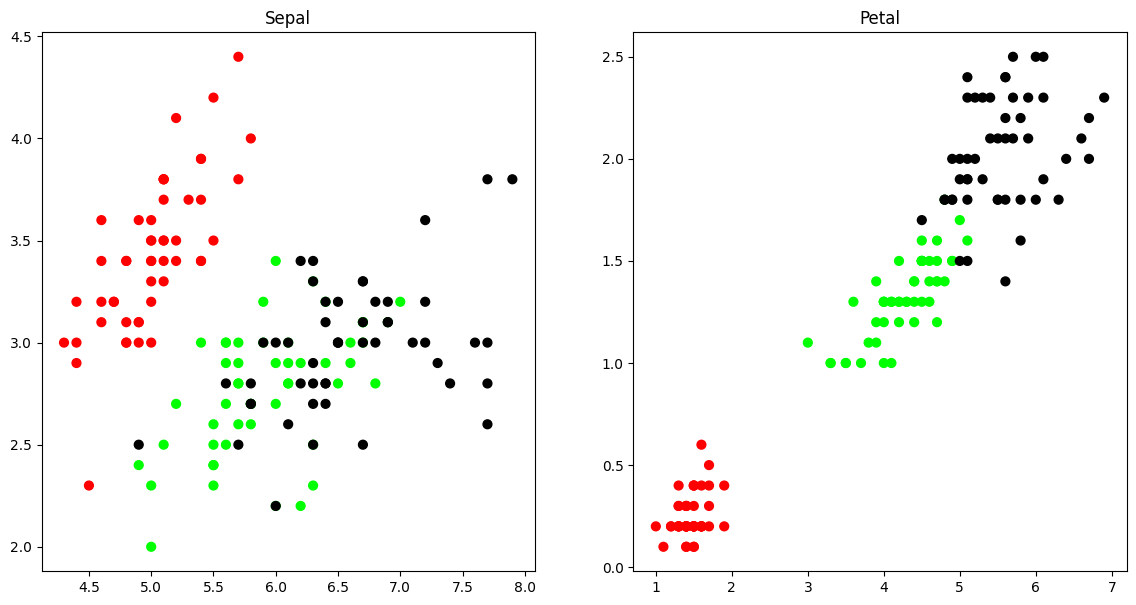

In [ ]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length,X.Sepal_Width,c=colormap[y.target],s=40)
plt.title('Sepal')
plt.subplot(1,2,2)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.target],s=40)
plt.title('Petal')
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


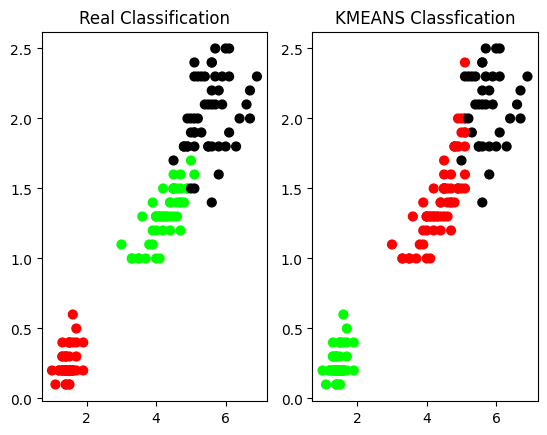

Accuracy
0.24
Confusion_matrix
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]
classification_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150



In [ ]:
model=KMeans(n_clusters=3)
model.fit(X)
print(model.labels_)
plt.subplot(1,2,1)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[y.target],s=40)
plt.title('Real Classification')
plt.subplot(1,2,2)
plt.scatter(X.Petal_length,X.Petal_Width,c=colormap[model.labels_],s=40)
plt.title( 'KMEANS Classfication')
plt.show()
print('Accuracy')
print(sm.accuracy_score(y,model.labels_))
print('Confusion_matrix')
print(sm.confusion_matrix(y,model.labels_))
print('classification_report')
print(sm.classification_report(y,model.labels_))


**Week 10 To implement K-Nearest Neighbor algorithm (K-NN)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
print(X)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print(y)

     Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [ ]:
#Split the data into train and test samples
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.1)
print("Dataset is split into training and testing...")
print("Size of training data and its label",x_train.shape,y_train.shape)
print("Size of testing data and its label",x_test.shape,y_test.shape)

Dataset is split into training and testing...
Size of training data and its label (135, 4) (135,)
Size of testing data and its label (15, 4) (15,)


In [ ]:

# prints Label no. and their names
for i in range(len(iris.target_names)):
  print("Label", i , "-",str(iris.target_names[i]))

Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica


In [ ]:
#create object of KNN classifer
classifer = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#perform Training
classifer.fit(x_train, y_train)#perform teating
y_pred=classifer.predict(x_test)

In [ ]:

#Display the results
print("Results of Classification using K-nn with K=3")
for r in range(0,len(x_test)):
  print(" sample:", str(x_test[r]), " Actual-label:",str(y_test[r]), " predict-label:", str(y_pred[r]))
print("Classification Accuracy :" , classifer.score(x_test,y_test))


Results of Classification using K-nn with K=3
 sample: [5.5 2.3 4.  1.3]  Actual-label: 1  predict-label: 1
 sample: [5.8 2.7 5.1 1.9]  Actual-label: 2  predict-label: 2
 sample: [6.2 2.8 4.8 1.8]  Actual-label: 2  predict-label: 2
 sample: [4.4 2.9 1.4 0.2]  Actual-label: 0  predict-label: 0
 sample: [5.4 3.9 1.3 0.4]  Actual-label: 0  predict-label: 0
 sample: [6.1 2.8 4.7 1.2]  Actual-label: 1  predict-label: 1
 sample: [7.7 2.8 6.7 2. ]  Actual-label: 2  predict-label: 2
 sample: [6.2 3.4 5.4 2.3]  Actual-label: 2  predict-label: 2
 sample: [6.7 3.  5.2 2.3]  Actual-label: 2  predict-label: 2
 sample: [5.8 2.7 5.1 1.9]  Actual-label: 2  predict-label: 2
 sample: [5.7 2.8 4.1 1.3]  Actual-label: 1  predict-label: 1
 sample: [6.5 3.  5.5 1.8]  Actual-label: 2  predict-label: 2
 sample: [5.6 3.  4.1 1.3]  Actual-label: 1  predict-label: 1
 sample: [5.  3.6 1.4 0.2]  Actual-label: 0  predict-label: 0
 sample: [4.6 3.6 1.  0.2]  Actual-label: 0  predict-label: 0
Classification Accuracy 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Ketrics')
print(classification_report(y_test,y_pred))


Confusion Matrix
[[4 0 0]
 [0 4 0]
 [0 0 7]]
Accuracy Ketrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



**Week 11 To implement Back Propagation Algorithm**

In [ ]:
import numpy as np
X = np.array(([2,9],[1,5],[3,6])) #Hours Studied,Hours Slept
y=np.array(([92],[86],[89])) #Test Score

y=y/100 #Max Test Score is 100

#Sigmoid Function
def sigmoid(x):
  return 1/(1+ np.exp(-x))

#Derivatives of Sigmoid function
def derivatives_sigmoid(x):
  return x*(1-x)
#Variable initialization
epoch=10000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayers_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons of output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayers_neurons))
bias_hidden=np.random.uniform(size=(1,hiddenlayers_neurons))  #bias matrix to the hidden layer
weight_hidden=np.random.uniform(size=(hiddenlayers_neurons,output_neurons)) #weight matrix to the output layer
bias_output=np.random.uniform(size=(1,output_neurons)) #matrix to output layer

for i in range(epoch):
  hinp1=np.dot(X,wh)
  hinp=hinp1+ bias_hidden
  hlayer_activation = sigmoid(hinp)

  outinp1=np.dot(hlayer_activation,weight_hidden)
  outinp = outinp1+bias_output
  output = sigmoid(outinp)

EO = y-output
outgrad=derivatives_sigmoid(output)
d_output = EO * outgrad
EH = d_output.dot(weight_hidden.T)
hiddengrad=derivatives_sigmoid(hlayer_activation)
d_hiddenlayer = EH * hiddengrad

weight_hidden += hlayer_activation.T.dot(d_output) * lr
bias_hidden += np.sum(d_hiddenlayer, axis=0,keepdims=True) * lr
wh += X.T.dot(d_hiddenlayer) * lr
bias_output += np.sum(d_output,axis=0,keepdims=True) *lr

print("Input: \n"+str(X))
print("Actual Output: \n"+str(y))
print("Predicted Output: \n",output)

Input: 
[[2 9]
 [1 5]
 [3 6]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.8845275 ]
 [0.88099354]
 [0.88560334]]


**Week 12 To implement Support Vector Machine**

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
print(X)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print(y)

     Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [ ]:
#Split the data into train and test samples
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.1)


In [ ]:
#Fitting the model
from sklearn.svm import SVC
model=SVC()
SVC=model.fit(x_train,y_train)

In [ ]:
#Predictions from the trained model
y_pred=SVC.predict(x_test)

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Ketrics')
print(classification_report(y_test,y_pred))

Confusion Matrix
[[9 0 0]
 [0 3 0]
 [0 0 3]]
Accuracy Ketrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

